In [ ]:
!pdflatex pipeline.tex

In [11]:
import pandas as pd, matplotlib.pyplot as plt
from lvtlaw.a_utils import k,wes_show, dis_flag, mag, save, del_mu, col_lin
from visuals.dataload import transformation, PLWcorrection, del_del, pick_star, correction_red_mu_stars
from visuals.plrelation import plotPL, plotPW
from visuals.deldel import plotdeldel

dis =  dis_flag[1]
col = wes_show[0]
absolute, extinction, tabsolute, wesenheit = transformation()
_, res, reg, pre = PLWcorrection()  
dpre_M, dres_M, dmc_M, dpre_S, dres_S, dmc_S, dSM = del_del()

print('Make changes from a_utils.py file. \n\nDataset: %i | Distance Method: %s | Wesenheit Index: '%(k, dis), wes_show)

Make changes from a_utils.py file. 

Dataset: 1 | Distance Method: _i | Wesenheit Index:  ['VI']


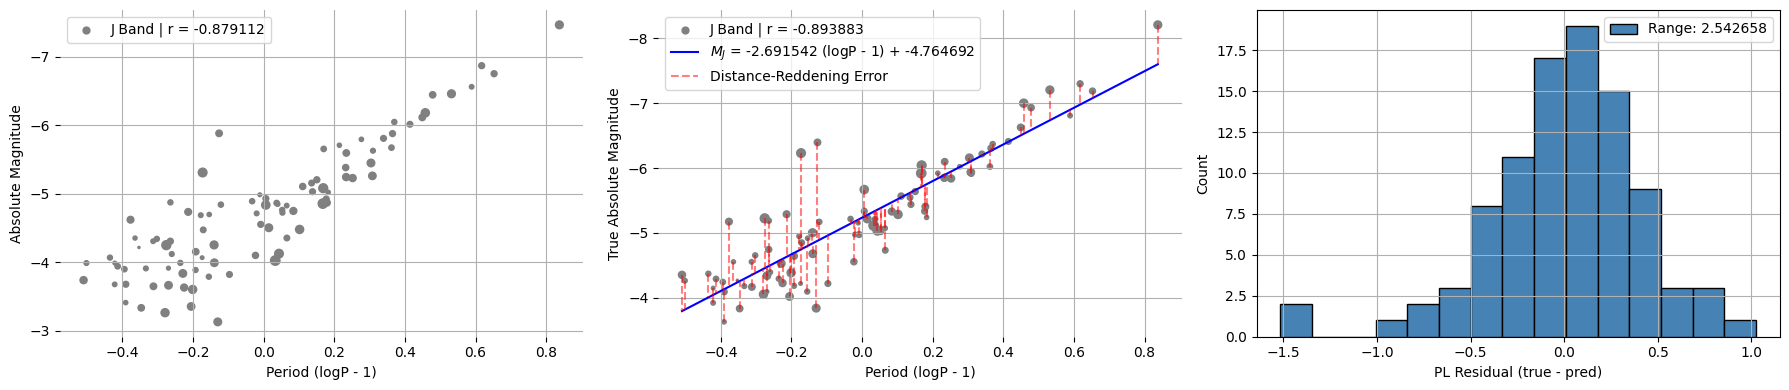

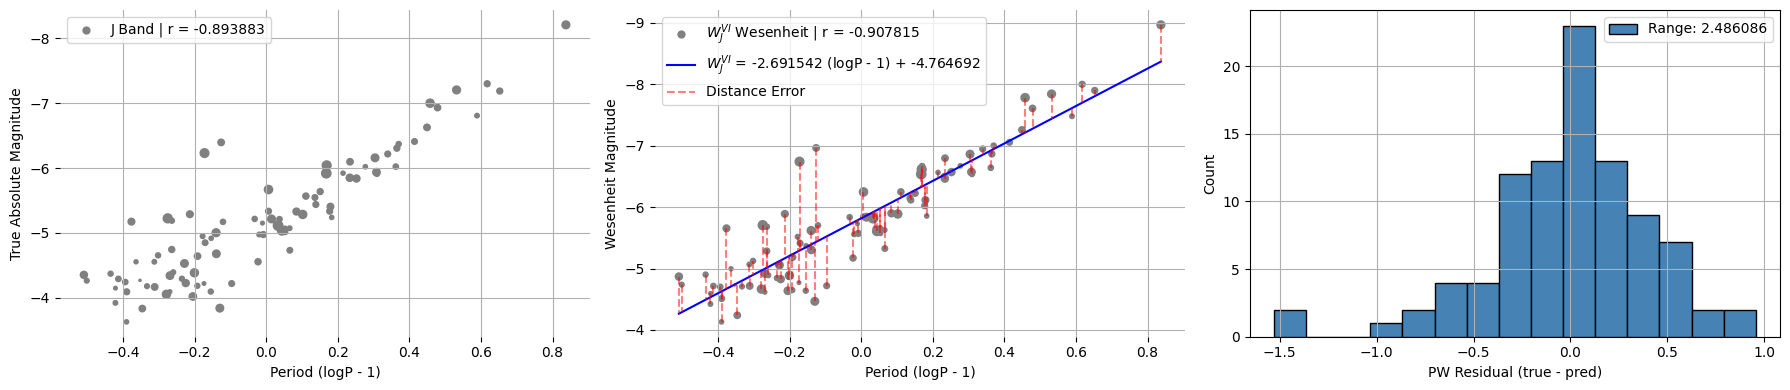

94_del_VI_J_i


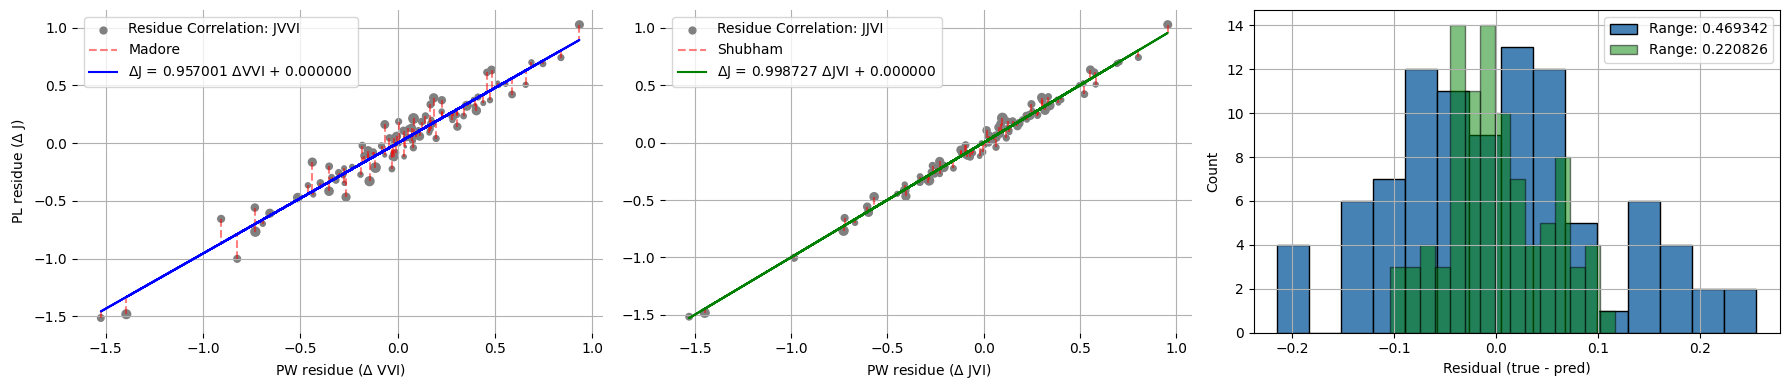

In [6]:
l = 2#len(mag)
for i in [3]:
    plotPL(i,absolute, tabsolute, res, reg, pre, dis)
    plotPW(i,tabsolute, wesenheit, col, res, reg, pre, dis)
    plotdeldel(i, tabsolute, col, res, dSM, dis)

94_85_star_VI_i


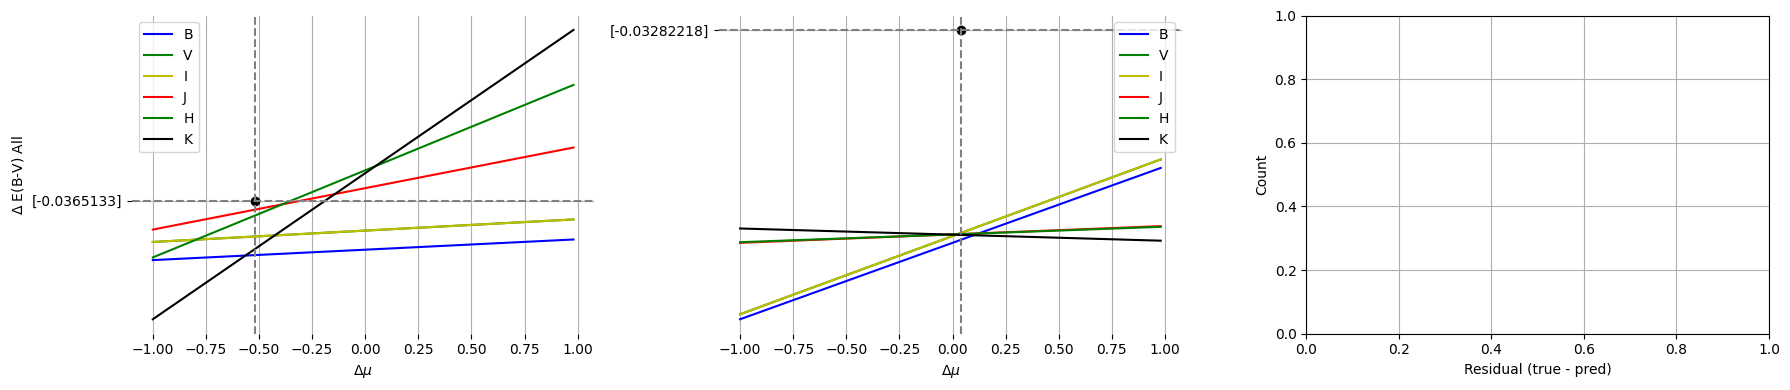

In [15]:
def plotstar(j, col, dis, s=0):
# 1. Extracting x-y axis
    abs_del,mu_rd = pick_star(j)
    x = del_mu
    c = correction_red_mu_stars()
    mu_M = c['mu'+dis+col+'_M'].iloc[j]
    E_M = c['rd'+dis+col+'_M'].iloc[j]
    mu_S = c['mu'+dis+col+'_S'].iloc[j]
    E_S = c['rd'+dis+col+'_S'].iloc[j]

    #    residualsM =  dSM[1][1]['d_' + M + dis]  
# === Plotting ===
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# 1. Deterministic model
    for i in range(len(mag)):
        ym = mu_rd[[col+dis+'rd_M'+str(mu) for mu in del_mu]].iloc[i].values    
        axs[0].plot(x, ym, col_lin[i], label='%s'%(mag[i]))
    axs[0].plot(mu_M, E_M, 'ko')
    axs[0].axhline(y=E_M, color='gray', linestyle='--')  # Red dashed line at y = 4
    axs[0].axvline(x=mu_M, color='gray', linestyle='--')  # Red dashed line at y = 4
    #axs[0].set_title('Absolute Mag')
    #axs[0].plot(1, predM, 'b-', label='$\Delta$%s = %f $\Delta$%s%s + %f'%(m,alphaM,col[0],col,gammaM))
    axs[0].set_ylabel(r'$\Delta$ E(B-V) All')
    axs[0].set_xlabel(r'$\Delta \mu$')

# 2. Statistical model with linear regression fit
    for i in range(len(mag)):
        ys = mu_rd[[col+dis+'rd_S'+str(mu) for mu in del_mu]].iloc[i].values   
        axs[1].plot(x, ys, col_lin[i], label='%s'%(mag[i]))
    axs[1].plot(mu_S, E_S, 'ko') 
    axs[1].axhline(y=E_S, color='gray', linestyle='--')  # Red dashed line at y = 4
    axs[1].axvline(x=mu_S, color='gray', linestyle='--')  # Red dashed line at y = 4
    axs[1].set_xlabel(r'$\Delta \mu$')
    axs[1].legend()
#axs[1].set_title(' Linear Fit')
    for ax in axs[:2]:
        ax.grid(True)
        ax.legend()
        for spine in ax.spines.values():
            spine.set_visible(False)

# 3. Histogram of residuals
    residualsM = dres_S 
#    labelM = 'Range: %f'%(max(residualsM)-min(residualsM))
#    labelS = 'Range: %f'%(max(residualsS)-min(residualsS))
#    axs[2].hist(residualsM, bins=15, edgecolor='black', color='steelblue',label = labelM)
#    axs[2].hist(residualsS, bins=15, edgecolor='black', color='green',label = labelS, alpha = 0.5)
    #axs[2].set_title('Histogram of Model Residuals')
    axs[2].set_xlabel('Residual (true - pred)')
    axs[2].set_ylabel('Count')
    axs[2].grid(True)
    #axs[2].legend()
    plt.tight_layout()
    title = '%i_%i_star_%s%s'%(len(c), j, col, dis)
    print(title)
    if s==1:
        save(title,1)
    plt.show()

plotstar(85, col, dis)

In [55]:
c

,Unnamed: 0,rms_gVI_M,mu_gVI_M,rd_gVI_M,rms_gVI_S,mu_gVI_S,rd_gVI_S,rms_iVI_M,mu_iVI_M,rd_iVI_M,rms_iVI_S,mu_iVI_S,rd_iVI_S
0,0,0.000283,-0.62,-0.018693,3.301207e-04,0.60,0.045233,0.097765,-1.00,0.125588,1.017038e-06,0.76,0.049237
1,1,0.000249,0.66,0.007049,3.683891e-07,0.54,0.001435,0.000220,0.76,0.007517,2.181320e-08,0.44,0.002913
2,2,0.000211,-0.28,0.024054,2.028737e-04,-0.02,0.037314,0.000114,-0.86,0.033287,3.414291e-08,0.46,0.047098
3,3,0.001531,0.80,0.025431,8.916671e-06,0.34,0.005357,0.001450,0.96,0.026242,2.420067e-07,-0.18,0.011855
4,4,0.000551,-0.38,-0.031517,1.734479e-04,-0.28,-0.034238,0.000344,0.34,-0.039500,9.957856e-09,0.06,-0.046801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,89,0.009987,0.98,-0.044021,4.912833e-04,0.14,-0.057602,0.189249,0.98,-0.206221,4.043538e-07,0.28,-0.067600
90,90,0.000781,0.38,-0.034679,1.828069e-04,0.40,-0.035201,0.000585,0.36,-0.041310,4.559125e-09,-0.16,-0.046757
91,91,0.000177,0.00,-0.018285,3.412472e-05,0.18,-0.015147,0.000138,0.00,-0.022012,6.413204e-08,0.32,-0.021563
92,92,0.000741,-0.18,-0.049135,1.378468e-05,0.76,-0.007554,0.036161,-1.00,0.033438,3.281142e-07,0.16,-0.017588
